# Assignment 5 Bonus


I have performed analysis based on several factors, over the entire year to determine most suitable city for my requirements. <br>
If I had to choose a city as my next home based on analysed data, it would be between Shanghai and Guangzhou. Between these 2, I would prefer Guangzhou. For the following reasons:
* I prefer warmer climate and Guangzhou has relatively higher average temperature (21.9 degrees). Shanghai also has a higher average temperature of 17 degrees
* PM analysis shows Guangzhou and Shanghai both have a low PM concentration throughout the year as compared to other cities. Thus they are less polluted
* Between Guangzhou and Shanghai, Guangzhou has lower cumulative wind speed (Iws), so it will be less windy

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
shanghai_df = pd.read_csv('Shanghai.csv')
chengdu_df = pd.read_csv('Chengdu.csv')
beijing_df = pd.read_csv('Beijing.csv')
guangzhou_df = pd.read_csv('Guangzhou.csv')
shenyang_df = pd.read_csv('Shenyang.csv')
shanghai_df = shanghai_df.assign(City = 'Shanghai')
shenyang_df = shenyang_df.assign(City = 'Shenyang')
guangzhou_df = guangzhou_df.assign(City = 'Guangzhou')
beijing_df = beijing_df.assign(City = 'Beijing')
chengdu_df = chengdu_df.assign(City = 'Chengudu')
cities_df = pd.concat([shanghai_df, shenyang_df,guangzhou_df ,beijing_df, chengdu_df], axis = 0).reset_index(drop=True)

In [4]:
cities_df.head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,City
0,2010,1,1,0,4.0,NaN,-6.0,59.48,1026.1,1.0,1.0,0.0,0.0,Shanghai
1,2010,1,1,1,4.0,NaN,-6.0,59.48,1025.1,1.0,2.0,0.0,0.0,Shanghai
2,2010,1,1,2,4.0,NaN,-7.0,59.21,1025.1,0.0,4.0,0.0,0.0,Shanghai
3,2010,1,1,3,4.0,NaN,-6.0,63.94,1024.0,0.0,5.0,0.0,0.0,Shanghai
4,2010,1,1,4,4.0,NaN,-6.0,63.94,1023.0,0.0,8.0,0.0,0.0,Shanghai


## Average temperature for cities

In [35]:
cities_df.groupby('City')['TEMP'].agg(['mean','std'])

,mean,std
City,,
Beijing,12.587040,12.098527
Chengudu,17.698158,7.843607
Guangzhou,21.996151,6.782722
Shanghai,17.471115,9.315528
Shenyang,8.460495,13.948303


* The temperature in Guangzhou does not vary a lot as it has a low standard deviation, which is preferrable

### Monthly Temperature Plot of Cities for Comparison

In [30]:
grouped_df = cities_df.groupby(["City","month"]).agg({'TEMP':'mean', 
                                                      'precipitation':'mean',
                                                      'PM':'mean',
                                                      'Iws':'mean'}).reset_index()


Text(0.5, 1.0, 'Temperature of cities across year')

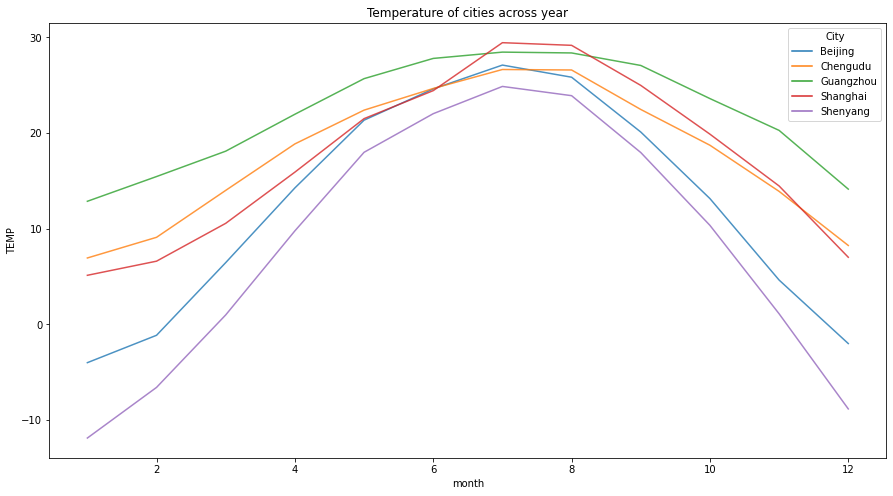

In [39]:
plt.figure(figsize = (15,8))
sns.lineplot(data = grouped_df, x = 'month', y = 'TEMP', hue = 'City', alpha = 0.8)
plt.title("Temperature of cities across year")

* Guangzhou has a warm temperature compared to other cities 
* Shanghai is also on the warmer side
* The winters in Guangzhou are not that cold and summers are not very hot

### Monthly PM (Particulate Matter) Plot of Cities for Comparison

Text(0.5, 1.0, 'PM Concentration of cities across year')

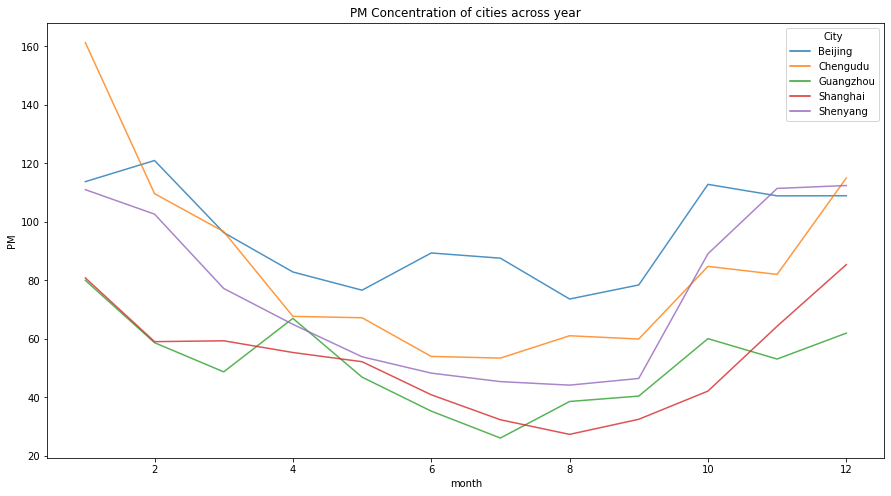

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(data = grouped_df, x = 'month', y = 'PM', hue = 'City', alpha = 0.8)
plt.title("PM Concentration of cities across year")

Text(0.5, 1.0, 'PM Concentration of cities across year')

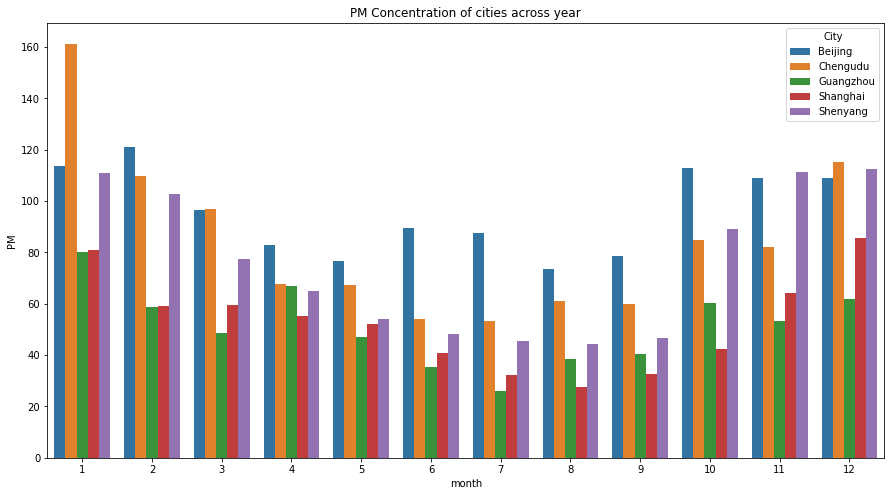

In [41]:
plt.figure(figsize = (15,8))
sns.barplot(data=grouped_df, x = 'month', y = 'PM', hue = 'City')
plt.title("PM Concentration of cities across year")

Text(0.5, 1.0, 'PM Concentration of cities across year')

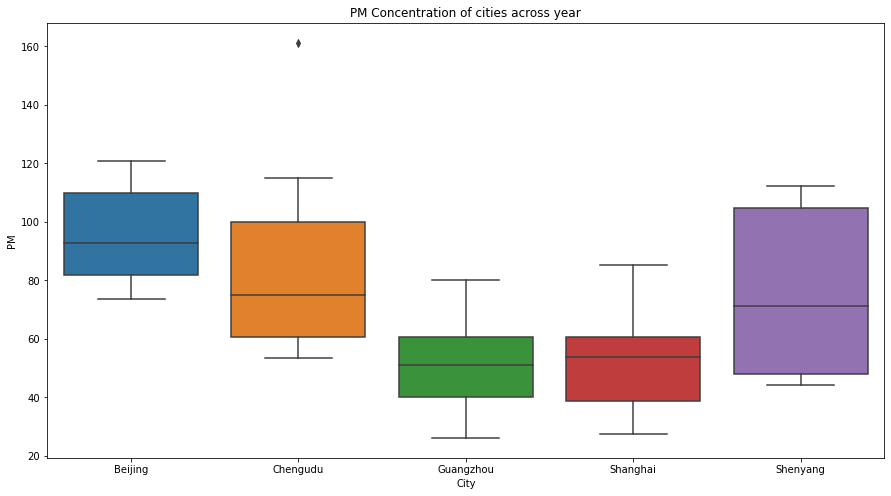

In [43]:
plt.figure(figsize = (15,8))
sns.boxplot(data=grouped_df, x = 'City', y = 'PM')
plt.title("PM Concentration of cities across year")

* Guangzhou has a low PM concentration compared to other cities, so it is less polluted
* Shanghai is also on the lower PM concentration side

Text(0.5, 1.0, 'Cumulated Wind Speed of cities across year')

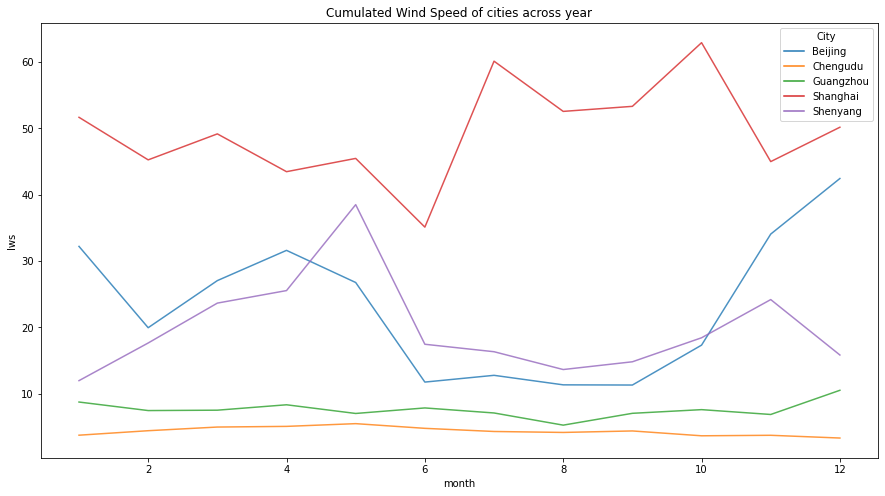

In [40]:
plt.figure(figsize = (15,8))
sns.lineplot(data = grouped_df, x = 'month', y = 'Iws', hue = 'City', alpha = 0.8)
plt.title("Cumulated Wind Speed of cities across year")

* Between Guangzhou and Shanghai, Guangzhou has lower wind speed, so it will be less windy throughout the year, which is preferred